In [1]:
import cv2
import os
import numpy as np

from tqdm.notebook import tqdm

In [24]:
mask_dir = '/home/dhkim/work/RoadDetector/albu-solution/results/Contec/Contec_test_2048'
img_dir = '/home/dhkim/work/RoadDetector/albu-solution/data/Contec/test/images_2048'
vis_dir = '/home/dhkim/work/RoadDetector/albu-solution/results/Contec/contec_test_vis'

In [28]:
img_list = os.listdir(img_dir)
mask_list = os.listdir(mask_dir)

for img_file in tqdm(img_list):
    img_path = os.path.join(img_dir, img_file)
    ori_img = cv2.imread(img_path)
    mask_file = [mask_file for mask_file in mask_list if img_file in mask_file][0]
    
    mask_path = os.path.join(mask_dir, mask_file)
    mask_img = cv2.imread(mask_path)
    ori_img = np.where(mask_img == (255,255,255), (0, 255, 255), ori_img)
    
    save_dir = os.path.join(vis_dir, img_file)
    cv2.imwrite(save_dir, ori_img)

  0%|          | 0/315 [00:00<?, ?it/s]

In [5]:
import shutil
import os
import json

from osgeo import osr
from osgeo import gdal

In [133]:
scene_dir = '/media/hdd1/03_DATASET/02_Segmentation_Data/01_work/phase_7_L1G'
scene_list = os.listdir(scene_dir)

for scene_file in tqdm(scene_list):
    work_dir = os.path.join(scene_dir, scene_file)
    png_file = os.path.join(work_dir, 'scene_img', 'png', scene_file[:-3]+'new.png')
    tif_file = os.path.join(work_dir, 'scene_img', 'tif', scene_file+'.tif')
    
    out_dir = '/media/hdd1/03_DATASET/11_RoadDetection/tif'
    save_file = os.path.join(out_dir, scene_file+'.tif')
    
    in_ds = gdal.Open(tif_file)
    in_band = in_ds.GetRasterBand(1)
    gtiff_driver = gdal.GetDriverByName('GTiff')
    out_ds = gtiff_driver.Create(save_file, in_band.XSize, in_band.YSize, 3, gdal.GDT_Byte, options=["BIGTIFF=YES"])
    out_ds.SetProjection(in_ds.GetProjection())
    out_ds.SetGeoTransform(in_ds.GetGeoTransform())
    
    png_img = cv2.imread(png_file)
    out_band = out_ds.GetRasterBand(1)
    out_band.WriteArray(png_img[:,:,2])
    out_band = out_ds.GetRasterBand(2)
    out_band.WriteArray(png_img[:,:,1])
    out_band = out_ds.GetRasterBand(3)
    out_band.WriteArray(png_img[:,:,0])
    
    out_srs = osr.SpatialReference()
    out_srs.ImportFromEPSG(3857)
    out_srs_wkt = out_srs.ExportToWkt()
    gdal.Warp(save_file, out_ds, dstSRS=out_srs_wkt)

  0%|          | 0/17 [00:00<?, ?it/s]

Warning 1: /media/hdd1/03_DATASET/02_Segmentation_Data/01_work/phase_7_L1G/K3A_20180707043623_18123_00088471_L1G/scene_img/tif/K3A_20180707043623_18123_00088471_L1G.tif: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: /media/hdd1/03_DATASET/02_Segmentation_Data/01_work/phase_7_L1G/K3A_20190129043331_21236_00507868_L1G/scene_img/tif/K3A_20190129043331_21236_00507868_L1G.tif: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: /media/hdd1/03_DATASET/02_Segmentation_Data/01_work/phase_7_L1G/K3A_20190129043331_21236_00459811_L1G/scene_img/tif/K3A_20190129043331_21236_00459811_L1G.tif: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: /medi

In [5]:
ori_dir = '/home/dhkim/work/RoadDetector/albu-solution/results/Contec/sample_test/origin_data'
scene_dir = '/home/dhkim/work/RoadDetector/albu-solution/results/Contec/sample_test/contec_test'
scene_list = os.listdir(scene_dir)

for scene_file in tqdm(scene_list):
    scene_path = os.path.join(scene_dir, scene_file)
    origin_path = os.path.join(ori_dir, scene_file)
    
    out_dir = '/home/dhkim/work/RoadDetector/albu-solution/results/Contec/sample_test/contec_test_convert_geo'
    save_file = os.path.join(out_dir, scene_file)
    
    in_ds = gdal.Open(origin_path)
    in_band = in_ds.GetRasterBand(1)
    gtiff_driver = gdal.GetDriverByName('GTiff')
    out_ds = gtiff_driver.Create(save_file, in_band.XSize, in_band.YSize, 1, gdal.GDT_Byte, options=["BIGTIFF=YES"])
    out_ds.SetProjection(in_ds.GetProjection())
    out_ds.SetGeoTransform(in_ds.GetGeoTransform())
    
    png_img = cv2.imread(scene_path)
    out_band = out_ds.GetRasterBand(1)
    out_band.WriteArray(png_img[:,:,2])
    
    out_ds.FlushCache()

  0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
import csv
from shapely.wkt import loads

In [8]:
graph_csv_dir = '/home/dhkim/work/RoadDetector/albu-solution/results/Contec/graph_csv'
tif_dir = '/home/dhkim/work/RoadDetector/albu-solution/data/Contec/all'
save_dir = '/home/dhkim/work/RoadDetector/albu-solution/results/Contec/road_results'
graph_csv_list = os.listdir(graph_csv_dir)

for graph_csv_file in tqdm(graph_csv_list):
    graph_csv_path = os.path.join(graph_csv_dir, graph_csv_file)
    input_pure = os.path.splitext(graph_csv_file)[0]
    tif_file = os.path.join(tif_dir, input_pure+'.tif')
    save_json = os.path.join(save_dir, input_pure+'.json')
    
    tif_img = gdal.Open(tif_file)
    geo_transform = tif_img.GetGeoTransform()

    res = {}
    res['type'] = 'FeatureCollection'
    res['name'] = input_pure
    res['crs'] = {'type':'name', 'properties':{'name':'urn:ogc:def:crs:EPSG::3857'}}
    res['features'] = []

    f = open(graph_csv_path, encoding='utf-8')
    rdr = csv.reader(f)
    for idx, line in enumerate(rdr):
        if idx > 0:
            points = loads(line[1])    
            properties = {'type':'R', 'name':input_pure, 'km':str(points.length*0.55*0.001)}
            
            coordinates = []
            for point in list(points.coords):
                tx = geo_transform[0] + geo_transform[1] * point[0]
                ty = geo_transform[3] + geo_transform[5] * point[1]
                coordinates.append([tx, ty])
            geometry = {'type':'LineString', 'coordinates':coordinates}

            Feature = {'type':'Feature', 'properties':properties, 'geometry':geometry}
            res['features'].append(Feature)

    with open(save_json, 'w') as f:
        json.dump(res, f, indent=4)

  0%|          | 0/17 [00:00<?, ?it/s]

## 원본 영상 좌표계 확인

In [8]:
import rasterio

tif_dir = '/home/dhkim/work/RoadDetector/albu-solution/data/Contec/all'
tif_list = os.listdir(tif_dir)

for tif in tqdm(tif_list):
    tif_path = os.path.join(tif_dir, tif)
    print(tif_path)
    dataset = rasterio.open(tif_path)
    print(tif, ' :: ', dataset.crs)

  0%|          | 0/17 [00:00<?, ?it/s]

/home/dhkim/work/RoadDetector/albu-solution/data/Contec/all/K3A_20180707043623_18123_00074560_L1G.tif
K3A_20180707043623_18123_00074560_L1G.tif  ::  LOCAL_CS["WGS 84 / Pseudo-Mercator",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3857"]]
/home/dhkim/work/RoadDetector/albu-solution/data/Contec/all/K3A_20151028043641_03268_00153764_L1G.tif
K3A_20151028043641_03268_00153764_L1G.tif  ::  LOCAL_CS["WGS 84 / Pseudo-Mercator",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3857"]]
/home/dhkim/work/RoadDetector/albu-solution/data/Contec/all/K3A_20190120043337_21100_00324917_L1G.tif


ERROR 1: PROJ: proj_identify: /home/dhkim/anaconda3/envs/cresi/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /home/dhkim/anaconda3/envs/cresi/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


K3A_20190120043337_21100_00324917_L1G.tif  ::  LOCAL_CS["WGS 84 / Pseudo-Mercator",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3857"]]
/home/dhkim/work/RoadDetector/albu-solution/data/Contec/all/K3A_20190102043431_20828_00329536_L1G.tif
K3A_20190102043431_20828_00329536_L1G.tif  ::  LOCAL_CS["WGS 84 / Pseudo-Mercator",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3857"]]
/home/dhkim/work/RoadDetector/albu-solution/data/Contec/all/K3A_20190129043331_21236_00531870_L1G.tif


ERROR 1: PROJ: proj_identify: /home/dhkim/anaconda3/envs/cresi/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /home/dhkim/anaconda3/envs/cresi/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


K3A_20190129043331_21236_00531870_L1G.tif  ::  LOCAL_CS["WGS 84 / Pseudo-Mercator",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3857"]]
/home/dhkim/work/RoadDetector/albu-solution/data/Contec/all/K3A_20180926042450_19347_00195222_L1G.tif
K3A_20180926042450_19347_00195222_L1G.tif  ::  LOCAL_CS["WGS 84 / Pseudo-Mercator",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3857"]]
/home/dhkim/work/RoadDetector/albu-solution/data/Contec/all/K3A_20190120043337_21100_00345008_L1G.tif


ERROR 1: PROJ: proj_identify: /home/dhkim/anaconda3/envs/cresi/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /home/dhkim/anaconda3/envs/cresi/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


K3A_20190120043337_21100_00345008_L1G.tif  ::  LOCAL_CS["WGS 84 / Pseudo-Mercator",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3857"]]
/home/dhkim/work/RoadDetector/albu-solution/data/Contec/all/K3A_20190129043331_21236_00507868_L1G.tif
K3A_20190129043331_21236_00507868_L1G.tif  ::  LOCAL_CS["WGS 84 / Pseudo-Mercator",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3857"]]
/home/dhkim/work/RoadDetector/albu-solution/data/Contec/all/K3A_20151028043641_03268_00099058_L1G.tif


ERROR 1: PROJ: proj_identify: /home/dhkim/anaconda3/envs/cresi/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /home/dhkim/anaconda3/envs/cresi/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


K3A_20151028043641_03268_00099058_L1G.tif  ::  LOCAL_CS["WGS 84 / Pseudo-Mercator",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3857"]]
/home/dhkim/work/RoadDetector/albu-solution/data/Contec/all/K3A_20180707043623_18123_00088471_L1G.tif
K3A_20180707043623_18123_00088471_L1G.tif  ::  LOCAL_CS["WGS 84 / Pseudo-Mercator",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3857"]]
/home/dhkim/work/RoadDetector/albu-solution/data/Contec/all/K3A_20190102043431_20828_00349927_L1G.tif


ERROR 1: PROJ: proj_identify: /home/dhkim/anaconda3/envs/cresi/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /home/dhkim/anaconda3/envs/cresi/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


K3A_20190102043431_20828_00349927_L1G.tif  ::  LOCAL_CS["WGS 84 / Pseudo-Mercator",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3857"]]
/home/dhkim/work/RoadDetector/albu-solution/data/Contec/all/K3A_20190120043337_21100_00365098_L1G.tif
K3A_20190120043337_21100_00365098_L1G.tif  ::  LOCAL_CS["WGS 84 / Pseudo-Mercator",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3857"]]
/home/dhkim/work/RoadDetector/albu-solution/data/Contec/all/K3A_20190129043331_21236_00459811_L1G.tif


ERROR 1: PROJ: proj_identify: /home/dhkim/anaconda3/envs/cresi/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /home/dhkim/anaconda3/envs/cresi/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


K3A_20190129043331_21236_00459811_L1G.tif  ::  LOCAL_CS["WGS 84 / Pseudo-Mercator",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3857"]]
/home/dhkim/work/RoadDetector/albu-solution/data/Contec/all/K3A_20151028043641_03268_00137294_L1G.tif
K3A_20151028043641_03268_00137294_L1G.tif  ::  LOCAL_CS["WGS 84 / Pseudo-Mercator",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3857"]]
/home/dhkim/work/RoadDetector/albu-solution/data/Contec/all/K3A_20180926042450_19347_00184622_L1G.tif


ERROR 1: PROJ: proj_identify: /home/dhkim/anaconda3/envs/cresi/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /home/dhkim/anaconda3/envs/cresi/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


K3A_20180926042450_19347_00184622_L1G.tif  ::  LOCAL_CS["WGS 84 / Pseudo-Mercator",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3857"]]
/home/dhkim/work/RoadDetector/albu-solution/data/Contec/all/K3A_20180926042450_19347_00161971_L1G.tif
K3A_20180926042450_19347_00161971_L1G.tif  ::  LOCAL_CS["WGS 84 / Pseudo-Mercator",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3857"]]
/home/dhkim/work/RoadDetector/albu-solution/data/Contec/all/K3A_20180707043623_18123_00050847_L1G.tif


ERROR 1: PROJ: proj_identify: /home/dhkim/anaconda3/envs/cresi/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /home/dhkim/anaconda3/envs/cresi/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


K3A_20180707043623_18123_00050847_L1G.tif  ::  LOCAL_CS["WGS 84 / Pseudo-Mercator",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3857"]]


ERROR 1: PROJ: proj_identify: /home/dhkim/anaconda3/envs/cresi/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


In [5]:
def calculate_slope(line_object):
    x_point1 = line_object[0]
    y_point1 = line_object[1]
    x_point2 = line_object[2]
    y_point2 = line_object[3]

    m = abs((y_point2 - y_point1) / (x_point2 - x_point1))
    m = float("{:.2f}".format(m))
    return m

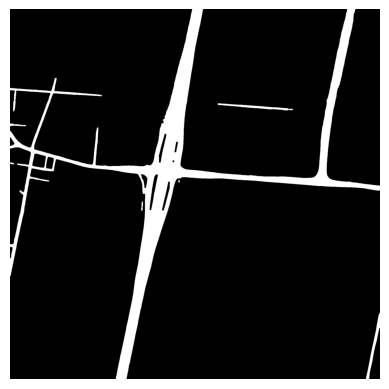

/home/dhkim/anaconda3/envs/cresi/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in float_scalars
  import sys


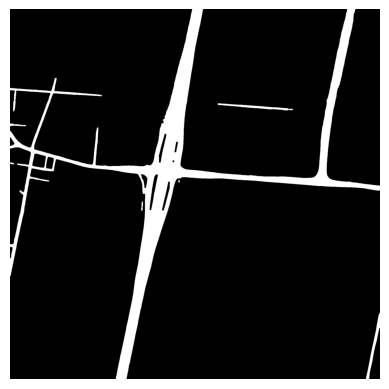

In [9]:
import matplotlib.pyplot as plt
import numpy as numpy

from skimage import io
from skimage import morphology
from skimage.measure import LineModelND, ransac

import os
import cv2

img_dir = '/home/dhkim/work/RoadDetector/albu-solution/results/Contec/Contec_test_2048'
img_list = os.listdir(img_dir)

for img_file in img_list[3:4]:
    img_path = os.path.join(img_dir, img_file)

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    plt.imshow(img, cmap="gray")
    plt.gca().axis("off")
    plt.show()
    
    d = cv2.ximgproc.createFastLineDetector()
    lines = d.detect(img)
    
    for current_line in lines:
        current_slope = calculate_slope(current_line[0])

    for neighbor_line in lines:
        current_x1 = int(current_line[0][0])
        current_y1 = int(current_line[0][1])
        current_x2 = int(current_line[0][2])
        current_y2 = int(current_line[0][3])

        compare_lines = current_line == neighbor_line[0]
        equal_arrays = compare_lines.all()
            
        if not equal_arrays:
            neighbor_slope = calculate_slope(neighbor_line[0])
            
        if abs(current_slope - neighbor_slope) < 1e-3:
            neighbor_x1 = int(neighbor_line[0][0])
            neighbor_y1 = int(neighbor_line[0][1])
            neighbor_x2 = int(neighbor_line[0][2])
            neighbor_y2 = int(neighbor_line[0][3])

            cv2.line(img,
                     pt1=(neighbor_x1, neighbor_y1),
                     pt2=(current_x2, current_y2),
                     color=(255, 255, 255),
                     thickness=3)
            cv2.line(img,
                     pt1=(current_x1, current_y1),
                     pt2=(neighbor_x2, neighbor_y2),
                     color=(255, 255, 255),
                     thickness=3)
    
plt.imshow(img, cmap="gray")
plt.gca().axis("off")
plt.show()

Found  16 contours


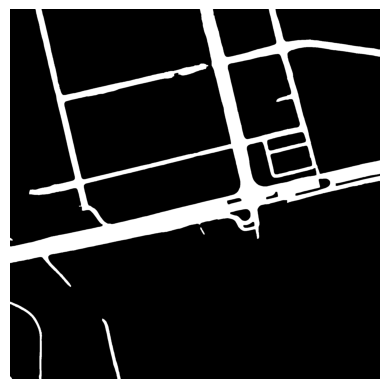

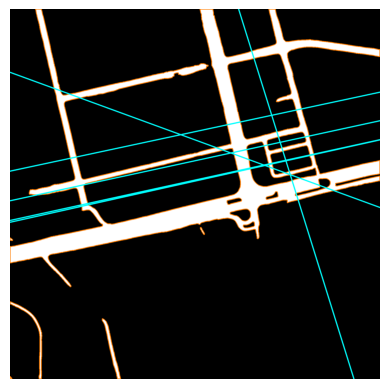

In [12]:
import matplotlib.pyplot as plt
import numpy as numpy

from skimage import io
from skimage import morphology
from skimage.measure import LineModelND, ransac

import os
import cv2

img_dir = '/home/dhkim/work/RoadDetector/albu-solution/results/Contec/Contec_test_2048'
img_list = os.listdir(img_dir)

for img_file in img_list[0:1]:
    img_path = os.path.join(img_dir, img_file)

    # get image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # threshold to binary
    ret, imgbin = cv2.threshold(img,5,255,cv2.THRESH_BINARY)

    # morph 
#     dilateKernelSize = 80; erodeKernelSize = 65;
#     imgbin = cv2.dilate(imgbin, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, [dilateKernelSize,dilateKernelSize]))
#     imgbin = cv2.erode(imgbin, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, [erodeKernelSize,erodeKernelSize]))

    # extract contours
    contours, _ = cv2.findContours(imgbin,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    print("Found ",len(contours),"contours")

    # fit lines for large contours
    lines = []; threshArea = 11000;
    for cnt in contours:
        if(cv2.contourArea(cnt)>threshArea):
            lines += [cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)] # [vx,vy,x,y]


    # show results
    imgresult = cv2.cvtColor(imgbin,cv2.COLOR_GRAY2RGB)
    cv2.drawContours(imgresult, contours, -1, (255,125,0), 3)

    VX_ = 0; VY_ = 1; X_ = 2; Y_ = 3;
    rows,cols = imgbin.shape[:2]
    p1 = [0,0]; p2 = [cols-1,0];
    for l in lines:
        p1[1]  = int(((    0-l[X_])*l[VY_]/l[VX_]) + l[Y_])
        p2[1] = int(((cols-l[X_])*l[VY_]/l[VX_]) + l[Y_])
        cv2.line(imgresult,p1,p2,(0,255,255),5)

    
plt.imshow(img, cmap="gray")
plt.gca().axis("off")
plt.show()

plt.imshow(imgresult, cmap="gray")
plt.gca().axis("off")
plt.show()

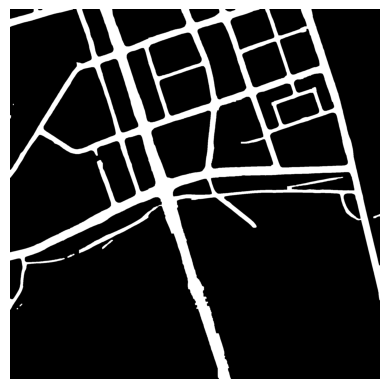

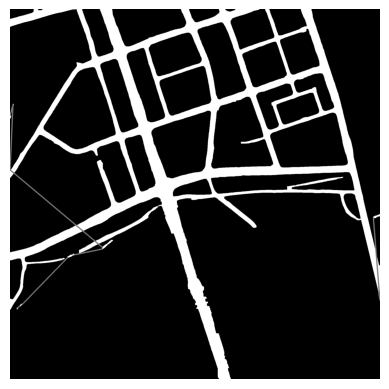

In [17]:
import numpy as np

img_dir = '/home/dhkim/work/RoadDetector/albu-solution/results/Contec/Contec_test_2048'
img_list = os.listdir(img_dir)

for img_file in img_list[2:3]:
    img_path = os.path.join(img_dir, img_file)

    # get image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    plt.imshow(img, cmap="gray")
    plt.gca().axis("off")
    plt.show()

    # find contours
    cnts1 = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #cnts = cnts[0] if len(cnts1) == 2 else cnts[1]
    cnts = cnts1[0]

    # For each contour, find the closest distance between their extreme points and join them
    for i in range(len(cnts)):
        min_dist = max(img.shape[0], img.shape[1])
        cl = []

        ci = cnts[i]
        ci_left = tuple(ci[ci[:, :, 0].argmin()][0])
        ci_right = tuple(ci[ci[:, :, 0].argmax()][0])
        ci_top = tuple(ci[ci[:, :, 1].argmin()][0])
        ci_bottom = tuple(ci[ci[:, :, 1].argmax()][0])
        ci_list = [ci_bottom, ci_left, ci_right, ci_top]

        for j in range(i + 1, len(cnts)):
            cj = cnts[j]
            cj_left = tuple(cj[cj[:, :, 0].argmin()][0])
            cj_right = tuple(cj[cj[:, :, 0].argmax()][0])
            cj_top = tuple(cj[cj[:, :, 1].argmin()][0])
            cj_bottom = tuple(cj[cj[:, :, 1].argmax()][0])
            cj_list = [cj_bottom, cj_left, cj_right, cj_top]

            for pt1 in ci_list:
                for pt2 in cj_list:
                    dist = int(np.linalg.norm(np.array(pt1) - np.array(pt2)))     #dist = sqrt( (x2 - x1)**2 + (y2 - y1)**2 )
                    if dist < min_dist:
                        min_dist = dist             
                        cl = []
                        cl.append([pt1, pt2, min_dist])
        if len(cl) > 0:
            cv2.line(img, cl[0][0], cl[0][1], 122, thickness = 5)

    plt.imshow(img, cmap="gray")
    plt.gca().axis("off")
    plt.show()

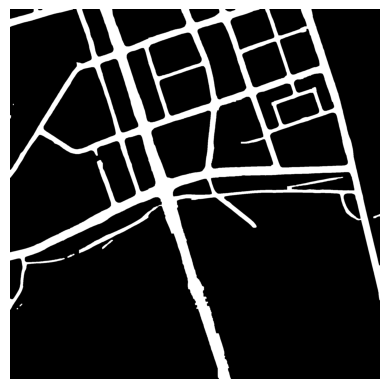

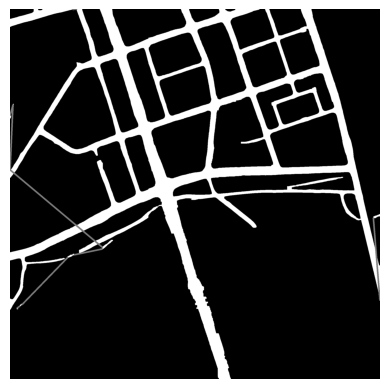

In [25]:
import numpy as np
import cv2
import random as rp

for img_file in img_list[2:3]:
    img_path = os.path.join(img_dir, img_file)
    
    # get image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    plt.imshow(img, cmap="gray")
    plt.gca().axis("off")
    plt.show()
    
    
    cnts = cv2.findContours(img , cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
    
    for i in range(len(cnts)):
        min_dist = max(img.shape[0], img.shape[1])
        cl = []

        ci = cnts[i]
        ci_left = tuple(ci[ci[:, :, 0].argmin()][0])
        ci_right = tuple(ci[ci[:, :, 0].argmax()][0])
        ci_top = tuple(ci[ci[:, :, 1].argmin()][0])
        ci_bottom = tuple(ci[ci[:, :, 1].argmax()][0])
        ci_list = [ci_bottom, ci_left, ci_right, ci_top]

        for j in range(i + 1, len(cnts)):
            cj = cnts[j]
            cj_left = tuple(cj[cj[:, :, 0].argmin()][0])
            cj_right = tuple(cj[cj[:, :, 0].argmax()][0])
            cj_top = tuple(cj[cj[:, :, 1].argmin()][0])
            cj_bottom = tuple(cj[cj[:, :, 1].argmax()][0])
            cj_list = [cj_bottom, cj_left, cj_right, cj_top]

            for pt1 in ci_list:
                for pt2 in cj_list:
                    dist = int(np.linalg.norm(np.array(pt1) - np.array(pt2)))     #dist = sqrt( (x2 - x1)**2 + (y2 - y1)**2 )
                    if dist < min_dist:
                        min_dist = dist             
                        cl = []
                        cl.append([pt1, pt2, min_dist])
        if len(cl) > 0:
            cv2.line(img, cl[0][0], cl[0][1], (125, 125, 125), thickness = 7)
    plt.imshow(img, cmap="gray")
    plt.gca().axis("off")
    plt.show()

In [40]:
import json
import math
from tqdm.notebook import tqdm

In [42]:
def get_dist(point_a, point_b):
    x1, y1 = point_a
    x2, y2 = point_b
    return math.hypot(x1-x2, y1-y2)

In [46]:
with open('/home/dhkim/work/RoadDetector/albu-solution/results/Contec/road_results/K3A_20151028043641_03268_00137294_L1G.json', "r") as json_f:
    r_json = json.load(json_f)
    
    for idx, i_feature in tqdm(enumerate(r_json['features'])):
        start_p = i_feature['geometry']['coordinates'][0]
        end_p = i_feature['geometry']['coordinates'][-1]
        
        connect_bool_s = False
        connect_bool_e = False
        for jdx, j_feature in enumerate(r_json['features']):
            if (idx != jdx):
                for coors in  j_feature['geometry']['coordinates']:
                    if start_p == coors:
                        connect_bool_s = True
                    if end_p == coors:
                        connect_bool_e = True
                        break
        if connect_bool_s == False:
            shortest_p = 999999
            
            for jdx, j_feature in enumerate(r_json['features']):
                if (idx != jdx):
                    for coors in  j_feature['geometry']['coordinates']:
                        dist = get_dist(start_p, coors)
                        if shortest_p > dist:
                            shortest_p = dist
                            connect_point = coors
                    r_json['features'][idx]['geometry']['coordinates'].append(connect_point)
                                
            
        if connect_bool_e == False:
            shortest_p = 999999
            
            for jdx, j_feature in enumerate(r_json['features']):
                if (idx != jdx):
                    for coors in  j_feature['geometry']['coordinates']:
                        dist = get_dist(start_p, coors)
                        if shortest_p > dist:
                            shortest_p = dist
                            connect_point = coors
                    r_json['features'][idx]['geometry']['coordinates'].append(connect_point)
    
    json.dumps(r_json, '/home/dhkim/work/RoadDetector/albu-solution/results/Contec/road_results/K3A_20151028043641_03268_00137294_L1G_modify.json' , indent=4)

0it [00:00, ?it/s]

TypeError: dumps() takes 1 positional argument but 2 positional arguments (and 1 keyword-only argument) were given